# Loan Approval Prediction with a Single-Layer Perceptron (TensorFlow/Keras)

This notebook implements a **multi‑input single‑output perceptron** to decide whether a bank should approve a loan application based on five features:

1. Applicant's annual income (in lakhs)  
2. Credit score (300 – 850)  
3. Number of existing loans  
4. Applicant's age  
5. Employment status (0 = unemployed, 1 = employed)

The perceptron has a single neuron with a **sigmoid** activation, trained to output  

*1* → Loan Approved  *0* → Loan Not Approved

We'll:

* Generate a small synthetic dataset  
* Scale/encode features  
* Build and train the model  
* Evaluate it on a test split


In [27]:
# Features / target
X = df.drop('approved', axis=1).values
y = df['approved'].values

# Scale continuous features (columns 0,1,3)
scaler = StandardScaler()
X[:, [0,1,3]] = scaler.fit_transform(X[:, [0,1,3]])

# Train‑test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Train samples: {len(X_train)}, Test samples: {len(X_test)}')


Train samples: 24, Test samples: 6


In [ ]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(5))
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/home/abhijit/miniconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

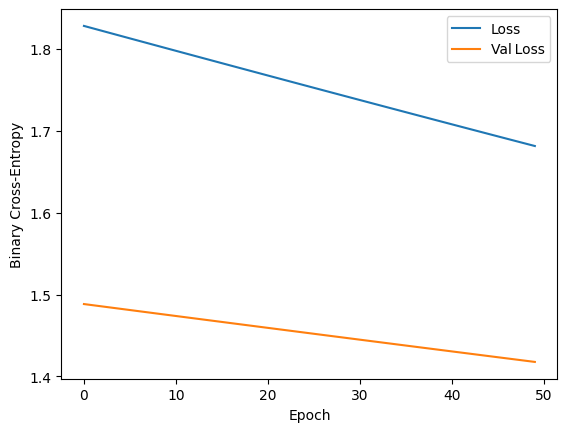

In [29]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=0
)

# Plot training history
plt.figure()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross‑Entropy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Classification report:
              precision    recall  f1-score   support

           0     0.5000    0.2000    0.2857         5
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.1667         6
   macro avg     0.2500    0.1000    0.1429         6
weighted avg     0.4167    0.1667    0.2381         6



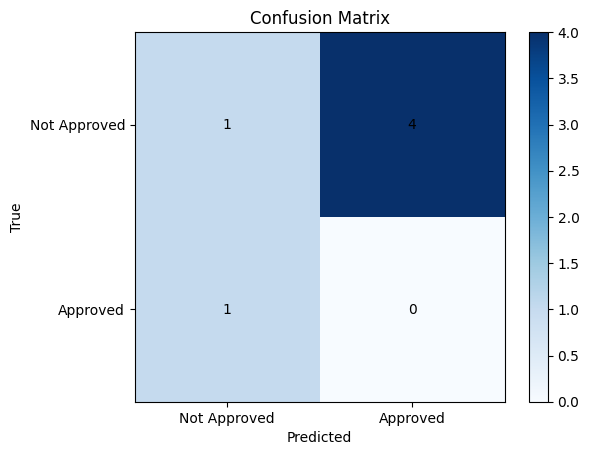

In [30]:
# Predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

print('\nClassification report:')
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0,1], ['Not Approved','Approved'])
plt.yticks([0,1], ['Not Approved','Approved'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()
